In [71]:
import seaborn as sns
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np

totals = pd.read_csv('data-totals/annual-totals/2020/final-totals/totals.csv')

fig = px.scatter_matrix(totals,
    dimensions=["Oil Total", "Solar Total", "Wind Total", "Hydro Total", "Nuclear Total", "Coal Total"])
fig.update_traces(diagonal_visible=False)
fig.update_layout(title="Total Sector Contributions Matrix (2020)",
                  dragmode='select',
                  width=1000,
                  height=1000,
                  hovermode='closest')
fig.show()

In [3]:
members = pd.read_csv('members.csv')
# totals_name_swapped = [" ".join(n.split(", ")[::-1]) for n in totals["Recipient"]]


years = np.array(['2010', '2012', '2014', '2016', '2018', '2020'])

# Creating autocpt arguments 
def autocpt(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%".format(pct, absolute) 

def get_totals(df):
    coal_sum = df["Coal Total"].sum()
    hydro_sum = df["Hydro Total"].sum()
    nuclear_sum = df["Nuclear Total"].sum()
    oil_sum = df["Oil Total"].sum()
    solar_sum = df["Solar Total"].sum()
    wind_sum = df["Wind Total"].sum()
    complete_sum = df["Total"].sum()
    return coal_sum, hydro_sum, nuclear_sum, oil_sum, solar_sum, wind_sum, complete_sum

def get_proportions(df):
    coal_sum, hydro_sum, nuclear_sum, oil_sum, solar_sum, wind_sum, complete_sum = get_totals(df)
    coal_proportion = (coal_sum / complete_sum) * 100
    hydro_proportion = (hydro_sum / complete_sum) * 100
    nuclear_proportion = (nuclear_sum / complete_sum) * 100
    oil_proportion = (oil_sum / complete_sum) * 100
    solar_proportion = (solar_sum / complete_sum) * 100
    wind_proportion = (wind_sum / complete_sum) * 100
    
    return np.array([coal_proportion, hydro_proportion, nuclear_proportion, oil_proportion, solar_proportion, wind_proportion])

def get_pie_chart(df, year):
    # Pie chart, where the slices will be ordered and plotted counter-clockwise:
    labels = 'Coal', 'Hydro', 'Nuclear', 'Oil', 'Solar', 'Wind'
    sizes = get_proportions(df)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, 
            labels=labels,
            autopct = lambda pct: autocpt(pct, sizes),
            shadow=True, 
            startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax1.set_title(year)
    plt.show()


In [4]:
industry_totals_array = pd.DataFrame(columns=['year', 'coal sum', 'hydro sum', 'nuclear sum', 'oil sum', 'solar sum', 'wind sum', 'complete sum'])
for year in years:
    df = pd.read_csv(f"data-totals/{year}/final-totals/totals.csv")
    coal_sum, hydro_sum, nuclear_sum, oil_sum, solar_sum, wind_sum, complete_sum = get_totals(df)
    industry_totals_array = industry_totals_array.append([[year, coal_sum, hydro_sum, nuclear_sum, oil_sum, solar_sum, wind_sum, complete_sum]])

industry_totals_array

,0,1,2,3,4,5,6,7,coal sum,complete sum,hydro sum,nuclear sum,oil sum,solar sum,wind sum,year
0,2010,946200.0,3352678.0,4306699.0,6379640.0,13000.0,1869950.0,16868167.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,2012,2322550.0,6867578.0,8737599.0,15463967.0,72750.0,3892775.0,37357219.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,2014,3516075.0,10761751.0,13447443.0,24910043.0,174242.0,6260067.0,59069621.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,2016,4160675.0,14718201.0,18021052.0,33484107.0,235202.0,8446397.0,79065634.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,2018,5049275.0,18448548.0,22052149.0,42135796.0,327502.0,10249846.0,98263116.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,2020,5695724.0,21401448.0,25178449.0,49809892.0,409302.0,11345046.0,113839861.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


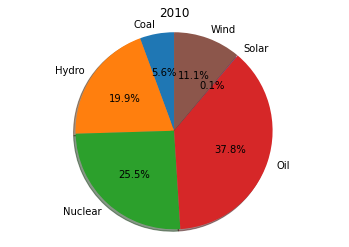

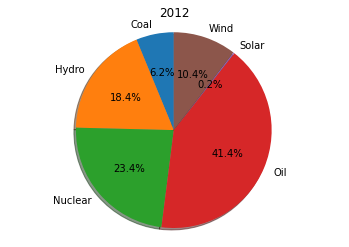

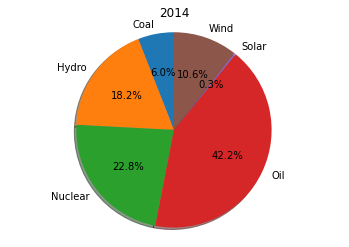

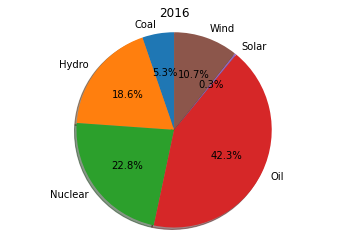

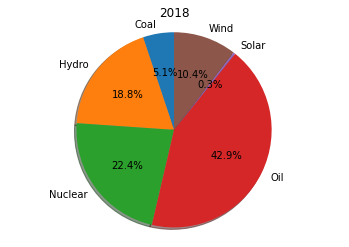

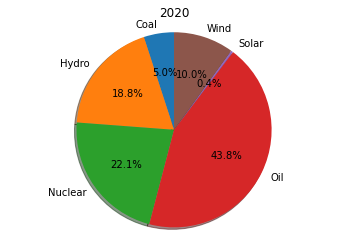

In [5]:
for year in years:
    df = pd.read_csv(f"data-totals/{year}/final-totals/totals.csv")
    get_pie_chart(df, year)

In [66]:
import plotly.express as px
import os

# Get the counts of companies
sectors = ["oil", "solar", "wind", "hydro", "nuclear", "coal"]
cycles = ["2010", "2012", "2014", "2016", "2020"]


comp_count_df = pd.DataFrame(columns=["Sector", "Count"])
for sector in sectors:
    path = f"data/{sector}/{sector}-companies.csv"
    sector_df = pd.read_csv(path)
    row_to_add = {}
    row_to_add["Sector"] = sector
    row_to_add["Count"] = len(sector_df)
    comp_count_df = comp_count_df.append(row_to_add, ignore_index=True)

comp_count_year_df = pd.DataFrame(columns=["Sector", "Year", "Count"])
for cycle in cycles:
    for sector in sectors:
        dir_path = f"data/{sector}/{cycle}/"
        file_count = len(os.listdir(dir_path))

        row_to_add = {}
        row_to_add["Cycle"] = cycle
        row_to_add["Sector"] = sector
        row_to_add["Count"] = file_count
        comp_count_year_df = comp_count_year_df.append(row_to_add, ignore_index=True)

comp_count_df.to_csv("viz-data/comp_count.csv")
fig_all = px.bar(comp_count_df, x="Sector", y="Count", title="Energy Company Dataset Breakdown by Sector")
fig_all.show()

comp_count_year_df.to_csv("viz-data/company_count_by_year.csv")
fig_years = px.bar(comp_count_year_df, x="Sector", y="Count", color="Cycle", title="Company Dataset Breakdown by Sector by Year")
fig_years.show()



In [50]:
sector_contribs_counts_df = pd.DataFrame(columns=["Sector", "Cycle", "Contributions Count", "Contribs Count R", "Contribs Count D"])

for cycle in cycles:
    for sector in sectors:
        path = f"data-totals/annual-totals/{cycle}/{sector}-totals.csv"
        sector_totals_df = pd.read_csv(path)
        sector_r = sector_totals_df[sector_totals_df["Party"] == "Republican"]
        sector_d = sector_totals_df[sector_totals_df["Party"] == "Democrat"]

        count_r = len(sector_r)
        count_d = len(sector_d)

        row_to_add = {}
        row_to_add["Cycle"] = cycle
        row_to_add["Sector"] = sector
        row_to_add["Contributions Count"] = count_d + count_r
        row_to_add["Contribs Count R"] = count_r
        row_to_add["Contribs Count D"] = count_d
        sector_contribs_counts_df = sector_contribs_counts_df.append(row_to_add, ignore_index=True)

sector_contribs_counts_df.to_csv("viz-data/sector_contribs_counts.csv")
fig_all = px.bar(sector_contribs_counts_df, x="Sector", y="Contributions Count", color="Cycle", title="Unique Contributions by Sector (All Parties)", range_y=[0, 2500])
# fig_all.write_image("viz-data/images/unique_contribs_all_parties.png")
fig_all.show()


fig_r = px.bar(sector_contribs_counts_df, x="Sector", y="Contribs Count R", color="Cycle", title="Unique Contributions by Sector to Republicans", range_y=[0, 2500])
fig_r.show()
# fig_r.write_image("viz-data/images/unique_contribs_republicans.png")

fig_d = px.bar(sector_contribs_counts_df, x="Sector", y="Contribs Count D", color="Cycle", title="Unique Contributions by Sector to Democrats", range_y=[0, 2500])
fig_d.show()
# fig_d.write_image("viz-data/images/unique_contribs_democrats.png")

In [52]:
sector_totals_by_year_df = pd.DataFrame(columns=["Sector", "Cycle", "Contributions ($)", "Contribs R ($)", "Contribs D ($)"])
for cycle in cycles:
    for sector in sectors:
        path = f"data-totals/annual-totals/{cycle}/{sector}-totals.csv"
        # print("opening path:", path)
        sector_totals_df = pd.read_csv(path)
        sector_r = sector_totals_df[sector_totals_df["Party"] == "Republican"]
        sector_d = sector_totals_df[sector_totals_df["Party"] == "Democrat"]

        sector_sum_all = sector_totals_df["Total"].sum()
        sector_sum_r = sector_r["Total"].sum()
        sector_sum_d = sector_d["Total"].sum()

        # print("sums:", sector_sum_all, sector_sum_r, sector_sum_d)
        row_to_add = {}
        row_to_add["Cycle"] = cycle
        row_to_add["Sector"] = sector
        row_to_add["Contributions ($)"] = sector_sum_all
        row_to_add["Contribs R ($)"] = sector_sum_r
        row_to_add["Contribs D ($)"] = sector_sum_d
        # print("row", row_to_add)
        sector_totals_by_year_df = sector_totals_by_year_df.append(row_to_add, ignore_index=True)

sector_totals_by_year_df.to_csv("viz-data/sector_totals_by_year.csv")
fig_all = px.bar(sector_totals_by_year_df, x="Sector", y="Contributions ($)", color="Cycle", title="Total Contribution Amount Breakdown by Sector by Year (All Parties)", range_y=[0, 45000000])
fig_all.show()

fig_r = px.bar(sector_totals_by_year_df, x="Sector", y="Contribs R ($)", color="Cycle", title="Total Contribution Amount Breakdown by Sector by Year to Republicans", range_y=[0, 45000000])
fig_r.show()

fig_d = px.bar(sector_totals_by_year_df, x="Sector", y="Contribs D ($)", color="Cycle", title="Total Contribution Amount Breakdown by Sector by Year to Democrats", range_y=[0, 45000000])
fig_d.show()

In [68]:
# Bargraph similar to above showing the breakdown for how bills impacted companies
sector_bill_impact_counts_df = pd.DataFrame(columns=["Sector", "Impact", "Count"])

impacts = ["Positive", "Neutral", "Negative"]
impact_map = {"Positive": 1, "Neutral": 0, "Negative": -1}
impact_color_map = {"Positive" : "#00CC96", "Neutral" : "#BAB0AC", "Negative" : "#EF553B"}
bills_df = pd.read_csv("bills_limited_sectors.csv")

for sector in sectors:
    for impact in impacts:
        s_impact = bills_df[bills_df[sector] == impact_map[impact]]
        row_to_add = {}
        row_to_add["Sector"] = sector
        row_to_add["Impact"] = impact
        row_to_add["Count"] = len(s_impact)
        sector_bill_impact_counts_df = sector_bill_impact_counts_df.append(row_to_add, ignore_index=True)

sector_bill_impact_counts_df.to_csv("viz-data/sector_bill_impact_counts.csv")
fig = px.bar(sector_bill_impact_counts_df, x="Sector", y="Count", color="Impact", title="Bill Impact Breakdown by Sector",
    color_discrete_map=impact_color_map)
fig.show()



In [64]:
# Breakdown of our model_data (how many republicans, how many democrats)
party_color_map = {"Republican": "#EF553B", "Democrat" : "#636EFA"}

model_data_df = pd.read_csv("final-data/model-data.csv")
datapoints_r = model_data_df[model_data_df["member_party"] == "R"]
datapoints_d = model_data_df[model_data_df["member_party"] == "D"]
fig_df = pd.DataFrame(columns=["Party", "Count"])
fig_df["Party"] = ["Republican", "Democrat"]
fig_df["Count"] = [len(datapoints_r), len(datapoints_d)]

fig = px.pie(fig_df, values="Count", names="Party", color="Party", color_discrete_map=party_color_map, title="Final Dataset Member Party Breakdown")
fig.show()

# Breakdown of our model_data with bill proposer party breakdown
datapoints_r = model_data_df[model_data_df["bill_prop_party"] == "R"]
datapoints_d = model_data_df[model_data_df["bill_prop_party"] == "D"]
fig_df = pd.DataFrame(columns=["Party", "Count"])
fig_df["Party"] = ["Republican", "Democrat"]
fig_df["Count"] = [len(datapoints_r), len(datapoints_d)]

fig = px.pie(fig_df, values="Count", names="Party", color="Party", color_discrete_map=party_color_map, title="Final Dataset Bill Proposer Party Breakdown")
fig.show()

# Breakdown of of yes/no votes
datapoints_r = model_data_df[model_data_df["member_party"] == "R"]
datapoints_d = model_data_df[model_data_df["member_party"] == "D"]
fig_df = pd.DataFrame(columns=["Party", "Count"])
fig_df["Party"] = ["Republican", "Democrat"]
fig_df["Count"] = [len(datapoints_r[datapoints_r["vote_position"] == "Yes"]), len(datapoints_d[datapoints_d["vote_position"] == "Yes"])]

fig = px.pie(fig_df, values="Count", names="Party", color="Party", color_discrete_map=party_color_map, title="Final Dataset Yes Vote Party Breakdown")
fig.show()

fig_df["Count"] = [len(datapoints_r[datapoints_r["vote_position"] == "No"]), len(datapoints_d[datapoints_d["vote_position"] == "No"])]

fig = px.pie(fig_df, values="Count", names="Party", color="Party", color_discrete_map=party_color_map, title="Final Dataset Bill Proposer No Vote Party Breakdown")
fig.show()

In [ ]:
# The idea is to make a full version of the 

fig_mat = px.scatter_matrix(bills_df,
    dimensions=["oil","solar","wind","hydro","nuclear","coal"])
fig_mat.show()